# Data Analytics with Starwars

*   Starwars API ([SWAP](https://swapi.dev/))
*   Data from: https://dplyr.tidyverse.org/reference/starwars.html



## 1. Glancing the data

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Data Import
sw = pd.read_csv('Starwars.csv')
sw.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


### Column description
* name: Character's name  
* height
* mass(weight)
* hair_color 
* skin_color 
* eye_color 
* birth_year 
* sex(biological) 
* gender(social)  
* homeworld
* species

* Categorical variables: name, hair_color, skin_color, eye_color, sex, gender, homeworld, species
* Continuous variables: height, mass, birth_year

In [4]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [5]:
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [9]:
sw.describe(include=np.object)

<ipython-input-9-dd6f0951d1a9>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sw.describe(include=np.object)


,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [7]:
print('Hair colour: ', sw['hair_color'].unique())
print('Skin colour: ', sw['skin_color'].unique())
print('Eye colour: ', sw['eye_color'].unique())
print('Sex: ', sw['sex'].unique())
print('Gender: ', sw['gender'].unique())
print('Homeworld: ', sw['homeworld'].unique())
print('Species: ', sw['species'].unique())

Hair colour:  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
Skin colour:  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Eye colour:  ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
Sex:  ['male' 'none' 'female' 'hermaphroditic' nan]
Gender:  ['masculine' 'feminine' nan]
Homeworld:  ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'Mala

In [10]:
print("Data Volume: ", sw.shape[0]*sw.shape[1])
print("Missing Values: {} = {:.2f}% of the data".format(sw.isnull().sum().sum(), (sw.isnull().sum().sum()*100)/(sw.shape[0]*sw.shape[1])))
print("No. of Characters: ", sw['name'].nunique())
print("Species: ", sw['species'].nunique())

Data Volume:  957
Missing Values: 105 = 10.97% of the data
No. of Characters:  87
Species:  37


## 2.Questionaries
* Gender Ratio?
* Height Destribution?
* Heaviest or Lightest?
* Correlation between Height and Weight?

## 3. Data Cleansing

### 3-1.Missing Values

In [11]:
#NULL Check
sw.isnull().any(axis=0)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [12]:
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [13]:
# Replacing 0 to null values at numerical column
sw['height'].fillna(0, inplace=True)
sw['mass'].fillna(0, inplace=True)
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [14]:
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

      name  height   mass hair_color   skin_color  eye_color  birth_year  \
1    C-3PO   167.0   75.0        NaN         gold     yellow       112.0   
2    R2-D2    96.0   32.0        NaN  white, blue        red        33.0   
7    R5-D4    97.0   32.0        NaN   white, red        red         NaN   
21   IG-88   200.0  140.0       none        metal        red        15.0   
72  R4-P17    96.0    0.0       none  silver, red  red, blue         NaN   
84     BB8     0.0    0.0       none         none      black         NaN   

     sex     gender homeworld species  
1   none  masculine  Tatooine   Droid  
2   none  masculine     Naboo   Droid  
7   none  masculine  Tatooine   Droid  
21  none  masculine       NaN   Droid  
72  none   feminine       NaN   Droid  
84  none  masculine       NaN   Droid  
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Oli?   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0 

In [15]:
#Replacing none to Droid (Species)
sw['sex'][(sw['sex'] == 'none')] = 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


<ipython-input-15-5a48ae80c718>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw['sex'][(sw['sex'] == 'none')] = 'robot'


## 4.EDA & Visualization

### 4-1. Gender/Sex Ratio

In [16]:
sw['sex'].value_counts()
sw['gender'].value_counts()

masculine    66
feminine     17
Name: gender, dtype: int64

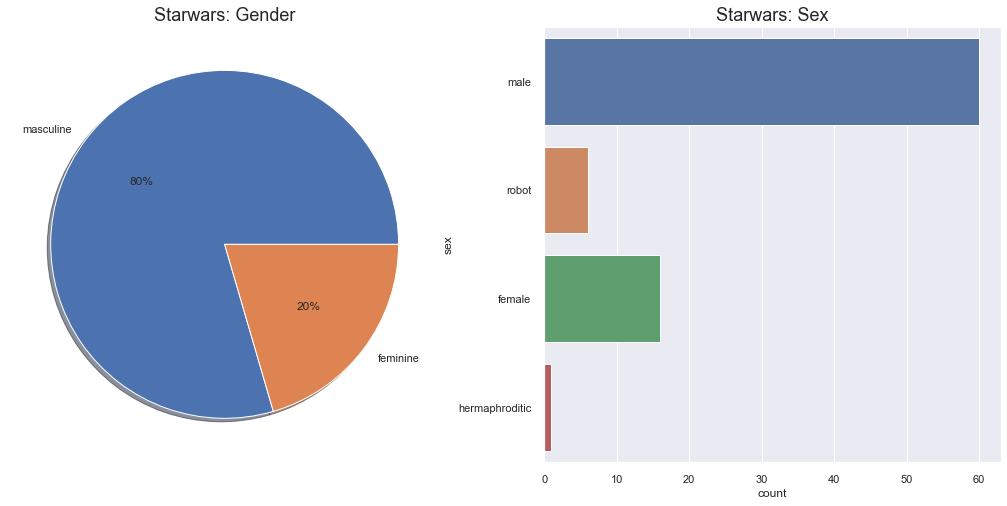

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sw['gender'].value_counts().plot.pie(ax=ax[0], autopct='%1.0f%%', shadow=True)
ax[0].set_title('Starwars: Gender', size=18)
ax[0].set_ylabel('')

sns.countplot(y='sex', data=sw, ax=ax[1])
ax[1].set_title('Starwars: Sex', size=18) #그래프 제목

plt.show()

### 4-2. Gender-Height distribution

In [18]:
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [19]:
#skewness and kurtosis
print("Skewness: %f" % sw['height'].skew())
print("Kurtosis: %f" % sw['height'].kurt())

Skewness: -1.760878
Kurtosis: 2.927697


In [20]:
sw[sw['sex'] == 'hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


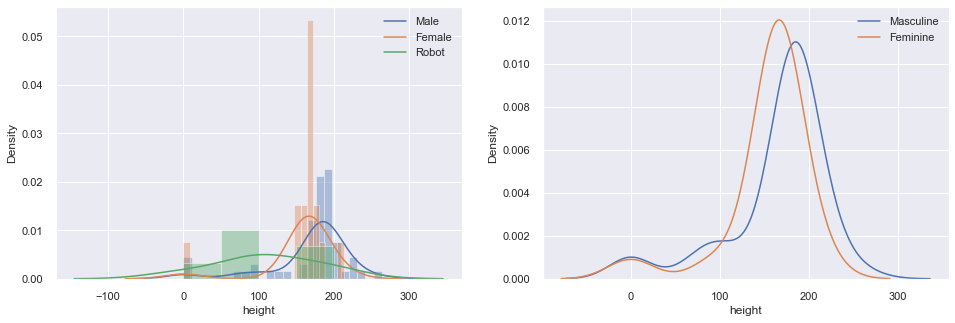

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

#sns.distplot
sns.distplot(sw[sw['sex'] == 'male']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax=ax[0])
ax[0].legend(['Male','Female','Robot'])

#sns.kdeplot
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax=ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['Masculine','Feminine'])

plt.show()

### 4-3. Heaviest and Lightest Character

In [22]:
notz = sw[sw['mass'] != 0]
min(notz['mass'])

15.0

In [23]:
print("{}'s weight is {}, which is heaviest ".format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print("{}'s weight is {}, which is lightest ".format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

['Ratts Tyerell']'s weight is 15.0, which is heaviest 
['Jabba Desilijic Tiure']'s weight is 1358.0, which is lightest 


### 4-4. Species comparison (Weight)

In [24]:
#Average calculation by function 'Groupby'
weight = sw[['species', 'mass']].groupby(['species'], as_index=True).mean()
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,0.000000
Clawdite,55.000000
Droid,46.500000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


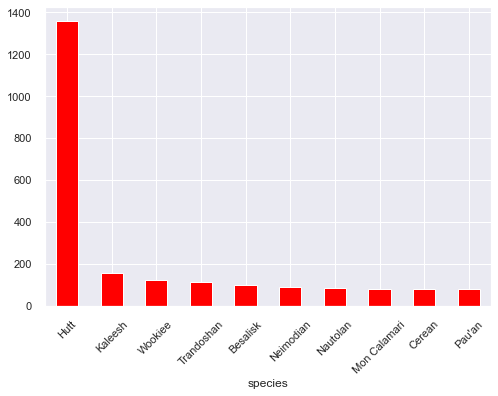

In [25]:
#Top 10 descending graph
weight['mass'].sort_values(ascending=False).head(10).plot.bar(color='red')

plt.xticks(rotation=45)
plt.show()

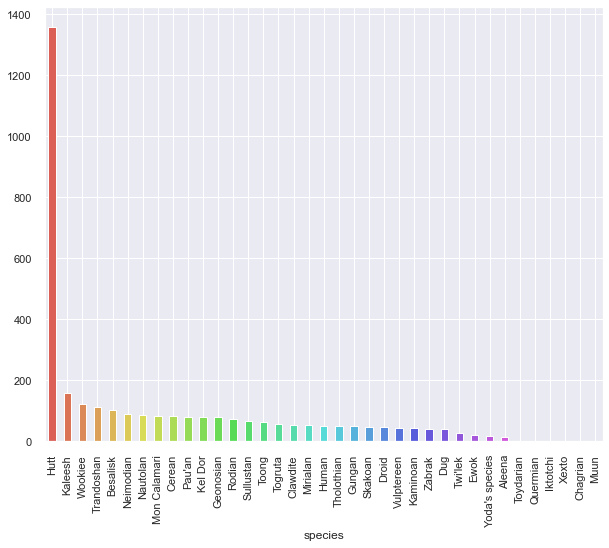

In [26]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = sns.color_palette('hls',len(weight['mass'])) #hls라는 컬러팔레트에서 어떤 컬러를 입혀줄지 결정

g = weight['mass'].sort_values(ascending=False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(),rotation=90) #라벨이 겹쳐져서 보이니까 90도 돌려준다

plt.show()

### 4-5. Height-Weight Correlation Graph

In [27]:
#Cleansing Outliers and 0 values
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin(['0'])
sw[~out1][~out2].shape

<ipython-input-27-09960d45410d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sw[~out1][~out2].shape


(86, 11)

<ipython-input-28-33f37882724c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(data=sw[~out1][~out2], x='height', y='mass') #hue=gender로 나타내서도 살펴보기


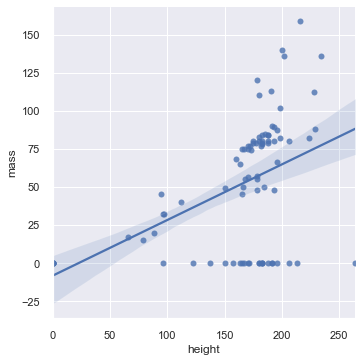

In [28]:
sns.lmplot(data=sw[~out1][~out2], x='height', y='mass') #hue=gender로 나타내서도 살펴보기
sns.set_style(style='darkgrid') #어두운 그리드로 배경 지정

plt.show()

## 5. Review

### 1. Data:  
- Data Volume:  957
- Missing Values: 105 = 10.97% of the data
- No. of Characters:  87
- Species:  37 

### 2. Gender/Sex ratio?  
- Male gender, 80%
  
### 3. Gender-Height distribution?  
- Male > Female > Robot
  
### 4. Heaviest vs Lightest?
- ['Ratts Tyerell']'s weight is 15.0, which is lightest 
- ['Jabba Desilijic Tiure']'s weight is 1358.0, which is heaviest

### 5. Correlation?  
- There is correlation between height and weight